#Section 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class NeuralNetwork(object):
    def __init__(self, layers = [1 , 10, 1], activations=['sigmoid', 'sigmoid']):
        
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    def fit(self, x):
        
        a = np.copy(x)
        z_s = []
        a_s = [a]
        for i in range(len(self.weights)):
            activation_function = self.getActivationFunction(self.activations[i])
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            a = activation_function(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)
    
    def backpropagation(self,y, z_s, a_s):

            dw = []  
            db = []  
            errors = [None] * len(self.weights)  
            
            errors[-1] = ((y-a_s[-1])*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))
            
            for i in reversed(range(len(errors)-1)):
                errors[i] = self.weights[i+1].T.dot(errors[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        
            
            batch_size = y.shape[1]
            db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in errors]
            dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(errors)]
            
            return dw, db
            
    def train(self, x, y, batch_size=512, epochs=1000, lr = 0.1):
    
        for e in range(epochs): 
            i=0
            while(i<len(y)):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                i = i+batch_size
                z_s, a_s = self.fit(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                if e == epochs - 1 : print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch) ))
    
    @staticmethod
    def getActivationFunction(name):
        return lambda x : np.exp(x)/(1+np.exp(x))
        
    
    @staticmethod
    def getDerivitiveActivationFunction(name):
        sig = lambda x : np.exp(x)/(1+np.exp(x))
        return lambda x :sig(x)*(1-sig(x)) 

      

In [ ]:
def main(layer , activations , X, Y, X_test, Y_test, epochs = 50, lr = 0.5, batch_size = 512):
    
    nn = NeuralNetwork(layer,activations)
    
    nn.train(X, Y, epochs, batch_size, lr )
    
    _, train = nn.fit(X)
    
    plt.scatter(X.flatten(), Y.flatten())
    plt.scatter(X.flatten(), train[-1].flatten())
    plt.show()

    _, prediction = nn.fit(X_test)

    plt.plot(X_test.flatten(), Y_test.flatten(), label='Actual')
    plt.plot(X_test.flatten() ,prediction[-1].flatten(), label='Predicted')
    plt.legend()
    plt.show()


#Section 2

#Sin(x)

loss = 17.979390602104544


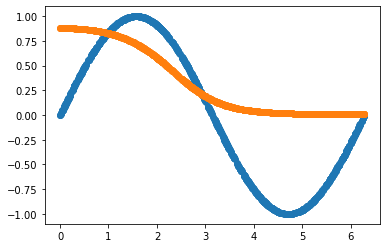

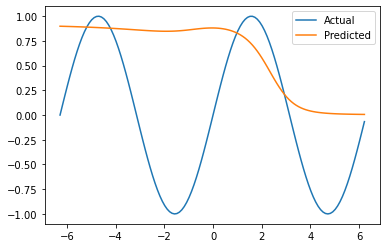

In [ ]:
x = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = np.sin(x)

x_test = np.arange(-2*np.pi, 2*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 10, 1]
activations =['sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 1500, 0.5)

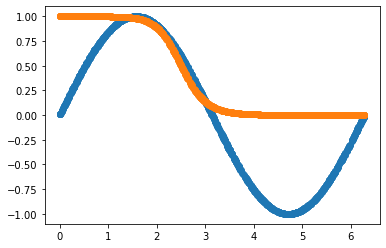

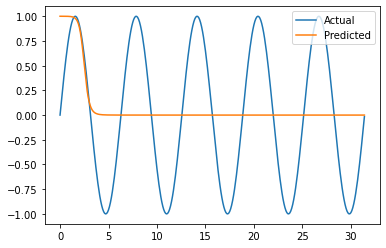

In [ ]:
x = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = np.sin(x)

x_test = np.arange(0, 10*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 100, 1]
activations =['sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 1500, 0.5)

loss = 35.15210297322193


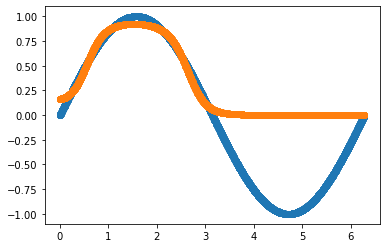

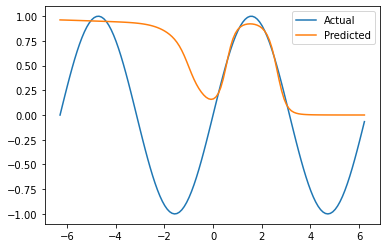

In [ ]:
x = 2*np.pi*np.random.rand(5000).reshape(1, -1)
y = np.sin(x)

x_test = np.arange(-2*np.pi, 2*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 128, 64, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 1000, 0.6)

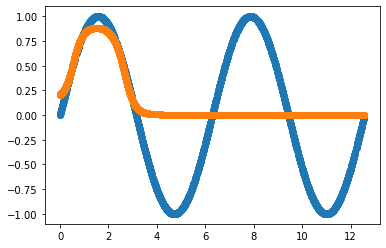

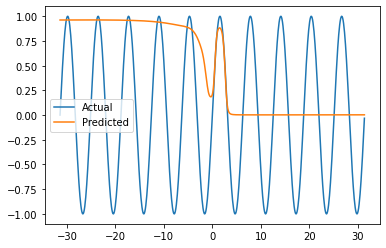

In [ ]:
x = 4*np.pi*np.random.rand(4000).reshape(1, -1)
y = np.sin(x)

x_test = np.arange(-10*np.pi, 10*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 128, 64, 32, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 5000, 0.6)

## Same as Keras 

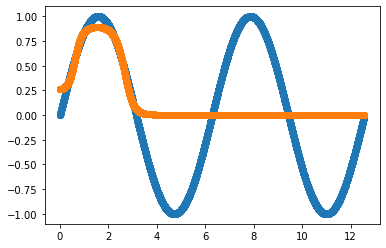

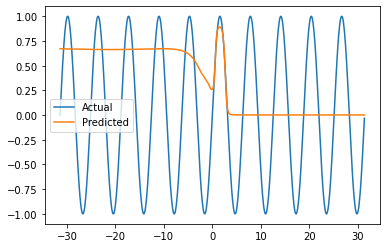

In [ ]:
 x = 4*np.pi*np.random.rand(10000).reshape(1, -1)
y = np.sin(x)

x_test = np.arange(-10*np.pi, 10*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 128, 64, 16, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 1000, 0.6)

#X^2

##same as keras

loss = 2.3601912158791287


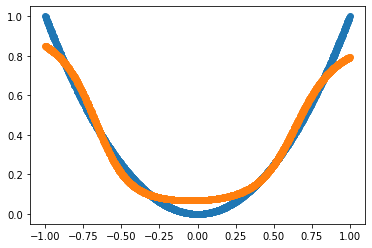

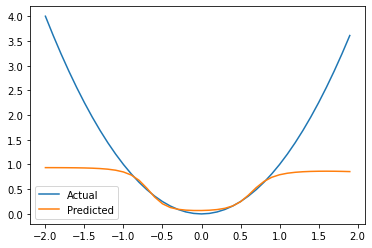

In [ ]:
x = np.random.uniform(-1, 1, 2000).reshape(1, -1)
y = x**2

x_test = np.arange(-2, 2, 0.1).reshape(1, -1)
y_test = x_test**2

layer = [1, 128, 64, 16, 1]

activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']

main(layer , activations, x, y, x_test, y_test, 1000, 0.6)

loss = 5.986933198279538


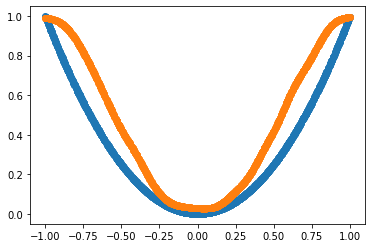

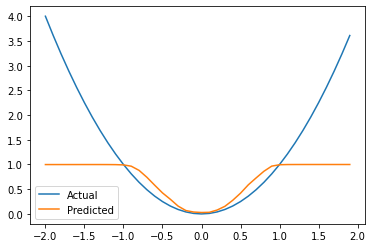

In [ ]:
x = np.random.uniform(-1, 1, 2000).reshape(1, -1)
y = x**2

x_test = np.arange(-2, 2, 0.1).reshape(1, -1)
y_test = x_test**2

layer = [1, 512, 512, 512, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']

main(layer , activations, x, y, x_test, y_test, 10000, 0.5)

#sin(x) + x

loss = 57.496103392112126


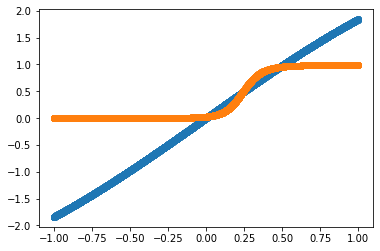

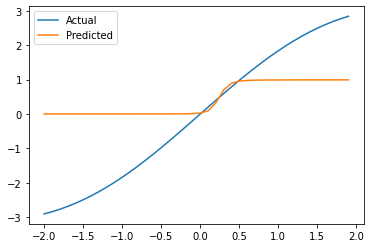

In [ ]:
x = np.random.uniform(-1, 1, 5000).reshape(1, -1)
y = x + np.sin(x)

x_test = np.arange(-2, 2, 0.1).reshape(1, -1)
y_test = x_test + np.sin(x_test)

layer = [1, 128, 64, 32, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']

main(layer , activations, x, y, x_test, y_test, 2000, 0.5)

In [ ]:
x = np.random.uniform(-5, 5, 5000).reshape(1, -1)
y = x + np.sin(x)

x_test = np.arange(-2, 2, 0.1).reshape(1, -1)
y_test = x_test + np.sin(x_test)

layer = [1, 128, 64, 32, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']

main(layer , activations, x, y, x_test, y_test, 2000, 0.5)

loss = 72.83148783127781


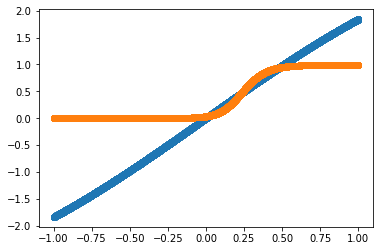

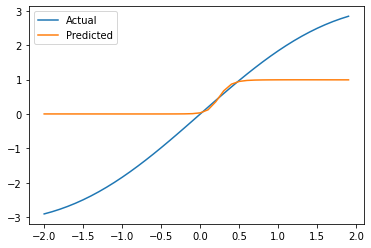

In [ ]:
x = np.random.uniform(-1, 1, 8000).reshape(1, -1)
y = x + np.sin(x)

x_test = np.arange(-2, 2, 0.1).reshape(1, -1)
y_test = x_test + np.sin(x_test)

layer = [1, 128, 64, 32, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']

main(layer , activations, x, y, x_test, y_test, 10000, 0.7)

#Section 3 noisy data

#sin(x) --noisy

loss = 15.451460958760881


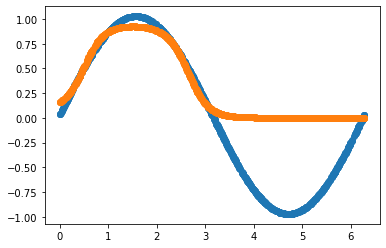

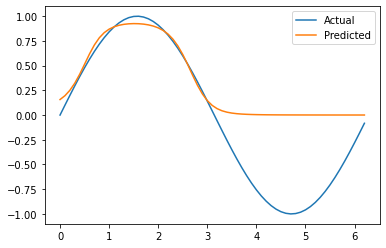

In [ ]:
x = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = np.sin(x) + np.random.uniform(low=-0.1, high=0.1, size=(len(x)))

x_test = np.arange(0, 2*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 128, 64, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 1000, 0.6)

loss = 9.76989066359129


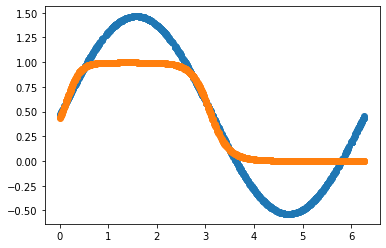

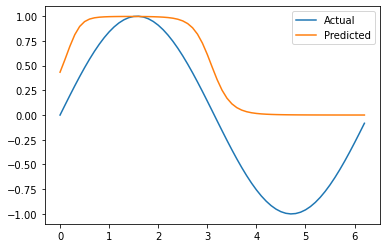

In [ ]:
x = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = np.sin(x) + np.random.uniform(low=-0.7, high=0.7, size=(len(x)))

x_test = np.arange(0, 2*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 128, 64, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 1000, 0.6)

loss = 305.12507651308323


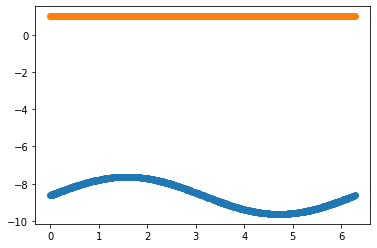

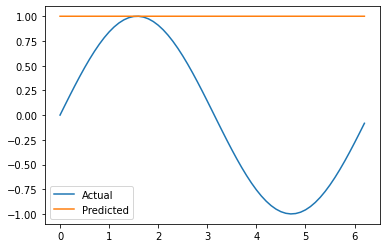

In [ ]:
x = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = np.sin(x) + np.random.uniform(low=-9, high=9, size=(len(x)))

x_test = np.arange(0, 2*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 128, 64, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 1000, 0.6)

#X^2 -- noisy 

loss = 2.6230521213097413


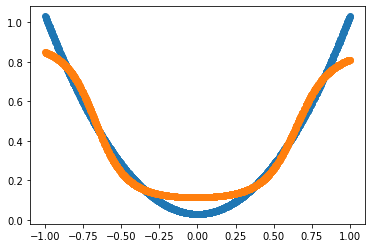

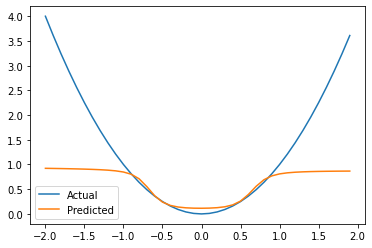

In [ ]:
x = np.random.uniform(-1, 1, 2000).reshape(1, -1)
y = x**2 + np.random.uniform(low=-0.1, high=0.1, size=(len(x)))

x_test = np.arange(-2, 2, 0.1).reshape(1, -1)
y_test = x_test**2

layer = [1, 128, 64, 16, 1]

activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']

main(layer , activations, x, y, x_test, y_test, 1000, 0.6)

loss = 7.884216633736595


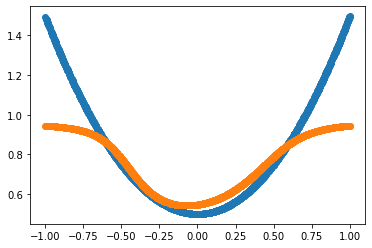

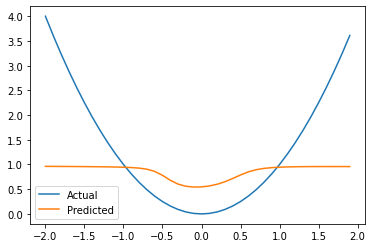

In [ ]:
x = np.random.uniform(-1, 1, 2000).reshape(1, -1)
y = x**2 + np.random.uniform(low=0.5, high=0.5, size=(len(x)))

x_test = np.arange(-2, 2, 0.1).reshape(1, -1)
y_test = x_test**2

layer = [1, 128, 64, 16, 1]

activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']

main(layer , activations, x, y, x_test, y_test, 1000, 0.6)

loss = 16.561213387116876


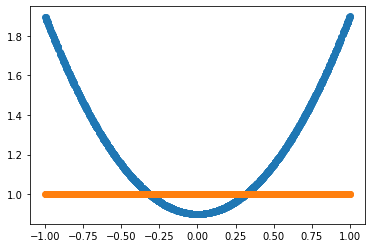

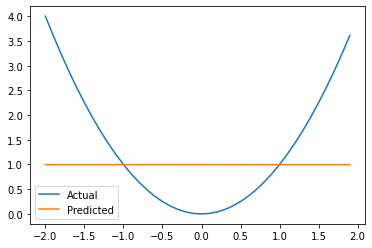

In [ ]:
x = np.random.uniform(-1, 1, 2000).reshape(1, -1)
y = x**2 + np.random.uniform(low=0.9, high=0.9, size=(len(x)))

x_test = np.arange(-2, 2, 0.1).reshape(1, -1)
y_test = x_test**2

layer = [1, 128, 64, 16, 1]

activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']

main(layer , activations, x, y, x_test, y_test, 1000, 0.6)

#sin(x) + x --noisy

loss = 34.99607615379013


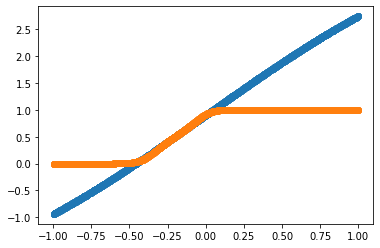

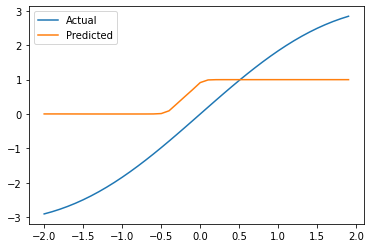

In [ ]:
x = np.random.uniform(-1, 1, 2000).reshape(1, -1)
y = x + np.sin(x) + np.random.uniform(low=0.9, high=0.9, size=(len(x)))

x_test = np.arange(-2, 2, 0.1).reshape(1, -1)
y_test = x_test + np.sin(x_test)

layer = [1, 512, 255, 128, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']

main(layer , activations, x, y, x_test, y_test, 10000, 0.5)